In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [120]:
data = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(31, inplace=True)

data['MA'] = data["Number of  reported results"].rolling(window=5).mean()
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),MA
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2,NaN
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,NaN
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,NaN
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,NaN
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,20524.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,159911.2
355,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,140162.0
356,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,124560.6
357,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,118316.0


In [121]:
x = 359 - np.array([i for i in range(332)])
y = data['Number of  reported results'][:332]

a = 350000
b = -10
c = 50

def lin_func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(lin_func, x, y, p0=(a, b))

C:\Users\hasit\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [122]:
popt

array([ 3.5e+05, -1.0e+01])

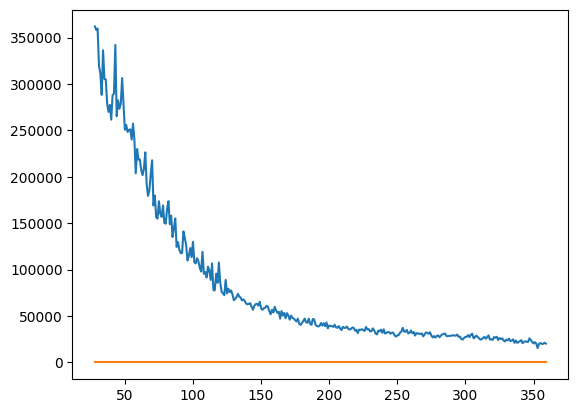

In [117]:
plt.plot(x,y)
plt.plot(x, np.exp(lin_func(x, *popt)))